In [55]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn import svm
from mlxtend.plotting import plot_decision_regions

Набор данных ex5data1.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит три переменные X1 и X2 (независимые переменные) и y (метка класса). Данные являются линейно разделимыми.

**1. Загрузите данные ex5data1.mat из файла.**

In [2]:
data = scipy.io.loadmat('ex5data1.mat')

In [3]:
X = data['X'] 
y = data['y']

**2. Постройте график для загруженного набора данных: по осям - переменные X1, X2, а точки, принадлежащие различным классам должны быть обозначены различными маркерами.**

In [4]:
def draw_data(X, y):
    pos = X[np.where(y==1)[0]]
    neg = X[np.where(y==0)[0]]

    plt.figure(figsize=(8,5))
    plt.scatter(pos[:,0], pos[:,1], marker='o', facecolors='none', edgecolors='b')
    plt.scatter(neg[:,0], neg[:,1], c='r', marker='x')

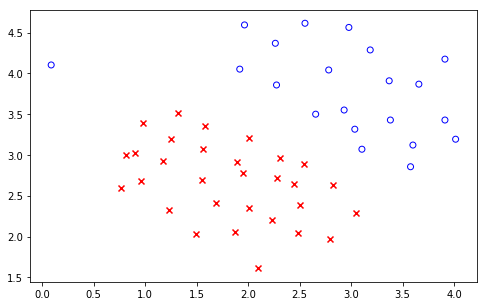

In [5]:
draw_data(X, y)

**3. Обучите классификатор с помощью библиотечной реализации SVM с линейным ядром на данном наборе.**

In [6]:
linear_svm_c1 = svm.SVC(C=1, kernel='linear')
linear_svm_c1.fit( X, y.flatten() )

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

**4. Постройте разделяющую прямую для классификаторов с различными параметрами C = 1, C = 100 (совместно с графиком из пункта 2). Объясните различия в полученных прямых?**

In [7]:
def draw_decision_boundry(svm, X, y):
    fig = plt.figure(figsize=(8,5))
    ax = plot_decision_regions(X, y.flatten(), clf=svm, markers='xo', colors='r,b', hide_spines=False)
    plt.show()

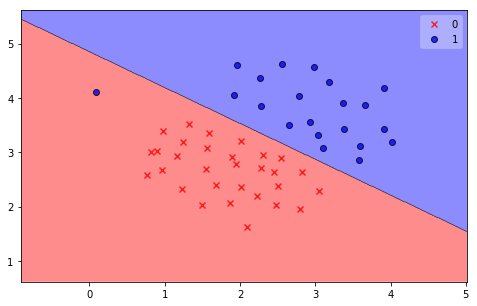

In [8]:
draw_decision_boundry(linear_svm_c1, X, y)

In [9]:
linear_svm_c100 = svm.SVC(C=100, kernel='linear')
linear_svm_c100.fit( X, y.flatten() )

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

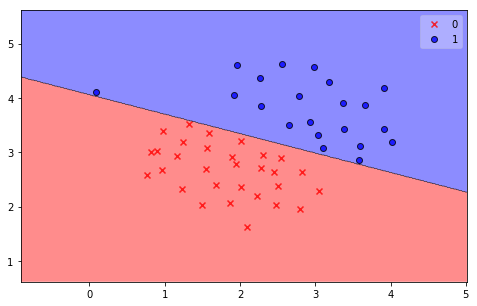

In [10]:
draw_decision_boundry(linear_svm_c100, X, y)

При C = 1 алгоритм попытался поулчить наибольший "margin" между классами, при этом некоторые "выбросы" были классифицированы ошибочно, но общий паттерн алгоритм определил. При C = 100 видно, что верно были классифицированы все данные, но "margin" сильно уменьшился. Видно, что модель страдает от переобучения (overfitting high variance)

**5. Реализуйте функцию вычисления Гауссового ядра для алгоритма SVM.**

In [11]:
def gaussian_kernel_similarity(x1, l1, sigma):
    diff = x1 - l1 
    
    numerator = np.dot(diff.T, diff) # нужно взять корень квадратный а потом возьвести в 2 степень
    
    denominator = (2 * (sigma ** 2))
    
    return np.exp(-numerator/ denominator)

In [12]:
gaussian_kernel_similarity(np.array([3, 3, 3]),np.array([1, 1, 1]), 2)

0.22313016014842982

In [13]:
def create_gaussian_f(X, L, sigma):
    xm = len(X)
    lm = len(L)
    fs = np.zeros([xm, lm])
    for xi in range(xm):
        x = X[xi]
        for lj in range(lm):
            l = L[lj]
            fs[xi][lj] = gaussian_kernel_similarity(x, l, sigma)
    
    return fs

Набор данных ex5data2.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит три переменные X1 и X2 (независимые переменные) и y (метка класса). Данные являются нелинейно разделимыми.

**6. Загрузите данные ex5data2.mat из файла.**

In [14]:
data2 = scipy.io.loadmat('ex5data2.mat')

In [15]:
X2 = data2['X']
y2 = data2['y']

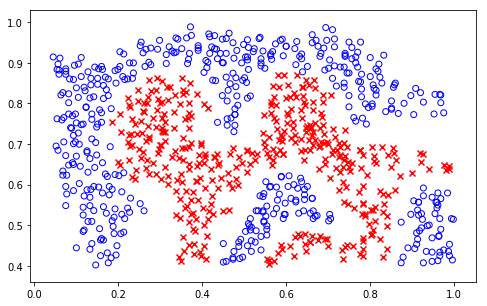

In [16]:
draw_data(X2, y2)

In [17]:
sigma_ex2 = 0.1

In [18]:
F = create_gaussian_f(X2, X2, sigma_ex2)
F.shape

(863, 863)

In [19]:
svm_ex_2 = svm.SVC(C=1, kernel='linear')
svm_ex_2.fit( F, y2.flatten() )

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

/Users/ls/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


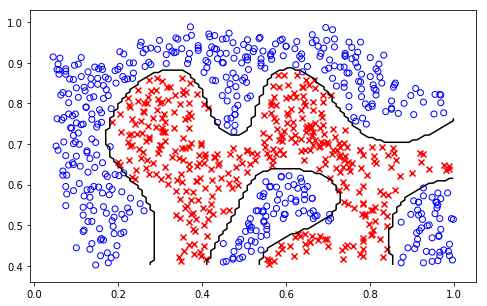

In [20]:
def visualize_boundary(L, y, svm, sigma):
    draw_data(L, y)

    x1_greed = np.linspace(L[:,0].min(), L[:,0].max(), 100)
    x2_greed = np.linspace(L[:,1].min(), L[:,1].max(), 100)
    
    X1, X2 = np.meshgrid(x1_greed, x2_greed)    
    Z = np.zeros(X1.shape)

    for i in range(X1.shape[1]):
        x = np.column_stack((X1[:, i], X2[:, i]))
        f = create_gaussian_f(x, L, sigma)
        Z[:, i] = svm.predict(f)

    plt.contour(X1, X2, Z, colors="black", levels=[0,0])
    plt.show(block=False)
    
visualize_boundary(X2, y2, svm_ex_2, sigma_ex2)

**Альтернативный вариант**

rbf => K(x, y) = exp(-gamma ||x-y||^2)

https://scikit-learn.org/stable/modules/metrics.html#rbf-kernel

The function rbf_kernel computes the radial basis function (RBF) kernel between two vectors. This kernel is defined as:
$$k(x, y) = \exp( -\gamma \| x-y \|^2)$$
where x and y are the input vectors. If $\gamma = \sigma^{-2}$ the kernel is known as the Gaussian kernel of variance .

In [37]:
def sigma_to_gamma_ang(sigma):
    return np.power(sigma, -2.) / 2

sigma_to_gamma_ang(2)

0.125

In [38]:
svm_ex_2_alt = svm.SVC(C=1, kernel='rbf', gamma=sigma_to_gamma_ang(sigma_ex2))
svm_ex_2_alt.fit( X2, y2.flatten() )

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

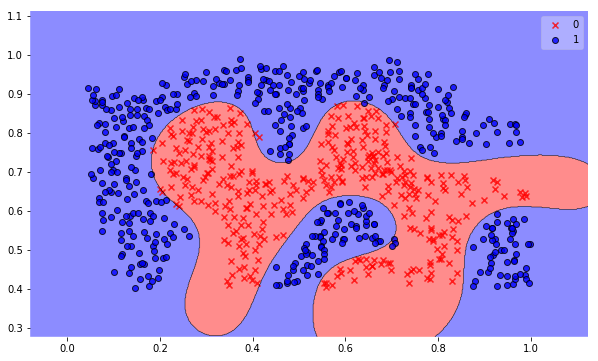

In [39]:
fig = plt.figure(figsize=(10, 6))
ax = plot_decision_regions(X2, y2.flatten(), clf=svm_ex_2_alt, markers='xo', colors='r,b', zoom_factor=8)
plt.show()

Набор данных ex5data3.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит три переменные X1 и X2 (независимые переменные) и y (метка класса). Данные разделены на две выборки: обучающая выборка (X, y), по которой определяются параметры модели; валидационная выборка (Xval, yval), на которой настраивается коэффициент регуляризации и параметры Гауссового ядра.

**10. Загрузите данные ex5data3.mat из файла.**

In [24]:
data3 = scipy.io.loadmat('ex5data3.mat')

In [40]:
X3_train = data3['X']
y3_train = data3['y']
X3_val = data3['Xval']
y3_val = data3['yval']

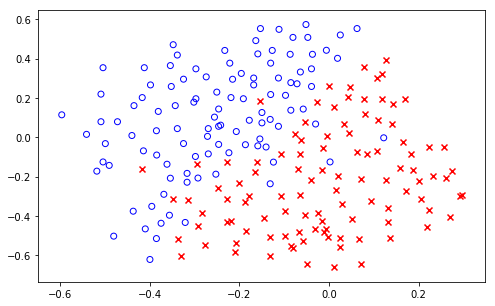

In [42]:
draw_data(X3_train, y3_train)

**11. Вычислите параметры классификатора SVM на обучающей выборке, а также подберите параметры C и σ2 на валидационной выборке.**

In [65]:
C_vals = [0.01, 0.04, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 5, 10, 20, 40, 80, 100]
sigma_vals = [0.01, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.4, 0.8, 1, 2, 5, 10, 20, 40, 80, 100]

In [66]:
best_score = 0
params = {
    'C': 0,
    'sigma': 0
}

for C in C_vals:
    for sigma in sigma_vals:
        model = svm.SVC(C=C, kernel='rbf', gamma=sigma_to_gamma_ang(sigma))
        model.fit(X3_train, y3_train.flatten())
        score = model.score(X3_val, y3_val)
        if score > best_score:
            best_score = score
            params['C'] = C
            params['sigma'] = sigma
            
print(f"Лучшая комбинация набрала {best_score}: С = {params['C']}, sigma = {params['sigma']}")

Лучшая комбинация набрала 0.97: С = 0.3, sigma = 0.08


In [67]:
best_model = svm.SVC(C=params['C'], kernel='rbf', gamma=sigma_to_gamma_ang(params['sigma']))
best_model.fit(X3_train, y3_train.flatten())

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=78.125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

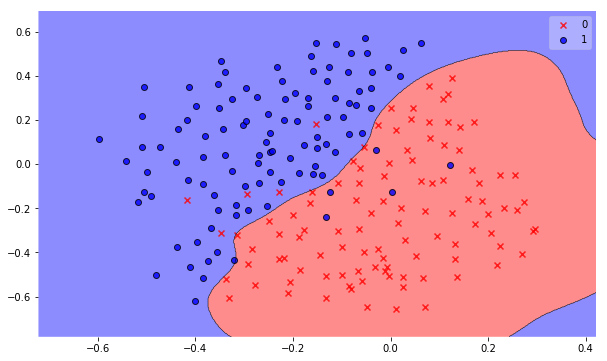

In [68]:
fig = plt.figure(figsize=(10, 6))
ax = plot_decision_regions(X3_train, y3_train.flatten(), clf=best_model, markers='xo', colors='r,b', zoom_factor=8)
plt.show()